## Juliette Cornet 03/14/2022
# Sentiment Analysis of Taylor Swift's Albums

## Part 1: Introduction 

#### As a comparative literature major, close-reader textual analysis is some thing I'm particularly interested in. Therefore, when we begun doing textual analysis via data science, I knew this was what I wanted to do my final project on. Considering Taylor Swift has recently been making a comeback, I thought it would intersting to look into her music and her persona which is where I got the inspiration for this project.

#### Taylor swift is known for constantly re-inventing herself. Her ever-changing persona is known to be split up into different "eras." While this is very apparent in the changes of her physial appearance and in her music videos and concert performances, I am curious to see if these shifts are identifiable from the lyrics in all her albums alone.Through data and textual analysis, I want to see if certain trends in her lyrics give us insight into the different changes she has undergone over the years. Therefore, through a combination of data science and textual analysis, is it possible to indenity different trends in Taylor Swift's lyrics throughout her albums?

The dataset I will be using is from Github and has every lyric from every song form her first eight albums: https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-09-29/taylor_swift_lyrics.csv .

## Part 2: Methods

I will begin by importing the data frame using pandas. 

In [226]:
import pandas as pd

In [227]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-29/taylor_swift_lyrics.csv')

Here is the imported data frame: 

In [228]:
df

,Artist,Album,Title,Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...
...,...,...,...,...
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ..."
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ..."
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...


As you can see, it is split up into 4 different columns: Artist, Album, Title, Lyrics. Since I want to be doing a textual analysis of how her lyrics have changed  between her albums, the two columns that are important to my research are the Album column and the Lyrics columns. 

For my analysis, I want to seperate all the albums and add combine the lyrics from all songs under one album title to make to text analysis procress easier. Therefore, below I turn the lyrics into lists based on the album they correspond to. I do this using a for loop. 

In [229]:
taylor_swift = []
fearless = []
speak_now = []
red = []
album_1989 = []
reputation = []
lover = []
folklore = []

num_rows = len(df)
# print(num_rows)

for i in range(num_rows):
    if df.loc[i,"Album"] == "Taylor Swift ":
        taylor_swift.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "Fearless":
        fearless.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "Speak Now ": 
        speak_now.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "Red":
        red.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "1989": 
        album_1989.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "reputation ":
        reputation.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "Lover ":
        lover.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "folklore ":
        folklore.append(df.loc[i,"Lyrics"])

Now that the lists have been made, the first thing I want to do is look at the most frequently used words throughout each album to see if we can begin indeifying differences. But first I need to clean up my data by tokenizing each list and removing the stopwords. 

In [230]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [231]:
#turning my album lyric lists into strings
taylor_swift_album = " ".join(taylor_swift)
fearless_album = " ".join(fearless)
red_album = " ".join(red)
album_1989_album = " ".join(album_1989)
reputation_album = " ".join(reputation)
lover_album = " ".join(lover)
folklore_album = " ".join(folklore)
speak_now_album = " ".join(speak_now)

In [232]:
#tokenizing
#taylor_swift
ts_sentences = sent_tokenize(taylor_swift_album)
ts_words = word_tokenize(taylor_swift_album.lower())
#fearless
f_sentences = sent_tokenize(fearless_album)
f_words = word_tokenize(fearless_album.lower())
#speaknow
s_sentences = sent_tokenize(speak_now_album)
s_words = word_tokenize(speak_now_album.lower())
#red
r_sentences = sent_tokenize(red_album)
r_words = word_tokenize(red_album.lower())
#1989
nine_sentences = sent_tokenize(album_1989_album)
nine_words = word_tokenize(album_1989_album.lower())
#reputation
rep_sentences = sent_tokenize(reputation_album)
rep_words = word_tokenize(reputation_album.lower())
#lover
l_sentences = sent_tokenize(lover_album)
l_words = word_tokenize(lover_album.lower())
#folklore
fo_sentences = sent_tokenize(folklore_album)
fo_words = word_tokenize(folklore_album.lower())

In [233]:
#removing stopwords
extrastopwords = ['``', "'s", "''", '``',"n't", "'m", 'oh',"'ll",'mmm',"'wo","'re'", 'ai', "'re","'ve", 'na','wan','would','said', "'cause", "'d", "oh-oh", "ha", "ooh", "ca", "yeah", "gon"]    
myStopWords = list(punctuation) + stopwords.words('english') + extrastopwords

In [234]:
tsNoStopWords = [w for w in ts_words if w not in myStopWords]
fNoStopWords = [w for w in f_words if w not in myStopWords]
sNoStopWords = [w for w in s_words if w not in myStopWords]
rNoStopWords = [w for w in r_words if w not in myStopWords]
nineNoStopWords = [w for w in nine_words if w not in myStopWords]
repNoStopWords = [w for w in rep_words if w not in myStopWords]
lNoStopWords = [w for w in l_words if w not in myStopWords]
foNoStopWords = [w for w in fo_words if w not in myStopWords]

Now that I've cleaned up the lyrics I pulled from the data set by tokenizing sentences and words and removing the stopwords, I can begin to look at the most frequently used words per album to begin indentifying different trends.

Let's start with her first album: 
#### Taylor Swift

In [235]:
freq_ts = FreqDist(tsNoStopWords)

In [236]:
for i in sorted(freq_ts, key=freq_ts.get, reverse=True)[:20]:
    print(i,freq_ts[i])

know 35
think 26
never 25
back 23
love 20
see 18
one 17
like 17
beautiful 17
way 15
song 15
baby 15
time 14
take 14
hope 13
still 13
could 12
let 12
everything 12
got 12


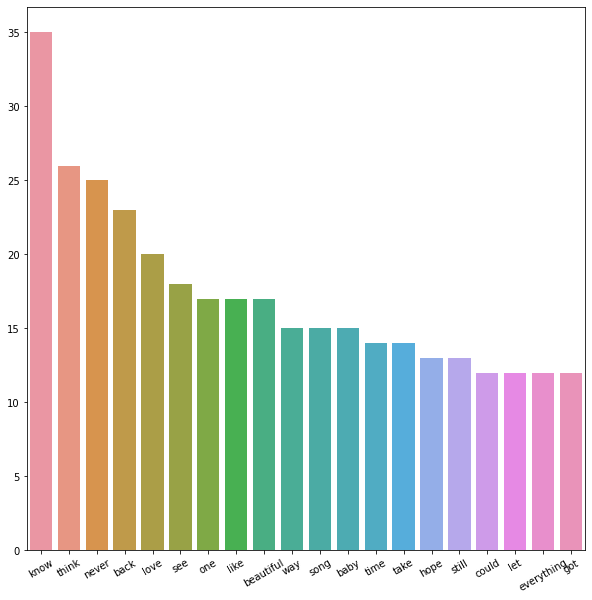

In [237]:
## Creating FreqDist for keeping the 20 most common words
ts_fdist = FreqDist(tsNoStopWords).most_common(20)
# Creating barplot
ts_fdist = pd.Series(dict(ts_fdist))
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=ts_fdist.index, y=ts_fdist.values, ax=ax)
plt.xticks(rotation=30);

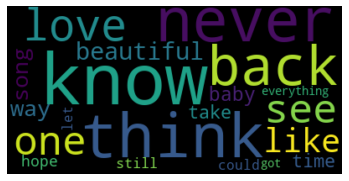

In [238]:
wcloud = WordCloud().generate_from_frequencies(ts_fdist)
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

#### Fearless

In [239]:
freq_f = FreqDist(fNoStopWords)

In [240]:
for i in sorted(freq_f, key=freq_f.get, reverse=True)[:20]:
    print(i,freq_f[i])

know 72
like 41
come 41
never 31
say 30
feel 27
see 26
time 25
baby 25
one 24
back 24
way 23
love 23
fall 22
could 22
got 20
tell 20
help 20
night 18
little 16


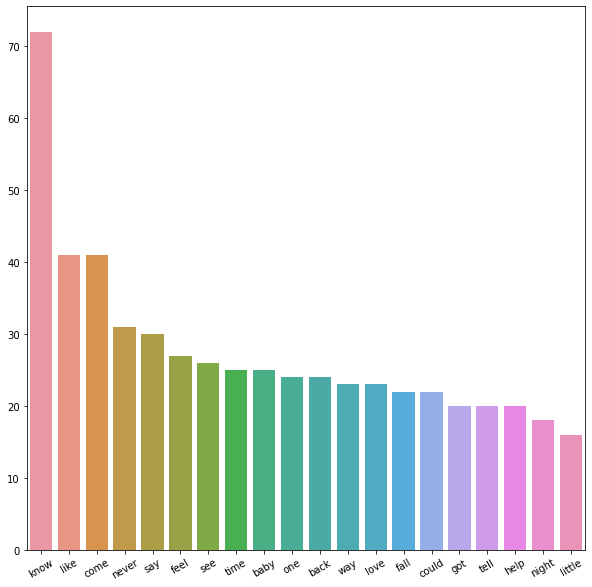

In [241]:
f_fdist = FreqDist(fNoStopWords).most_common(20)
f_fdist = pd.Series(dict(f_fdist))
fig, ax = plt.subplots(figsize=(10,10))
f_plot = sns.barplot(x=f_fdist.index, y=f_fdist.values, ax=ax)
plt.xticks(rotation=30);

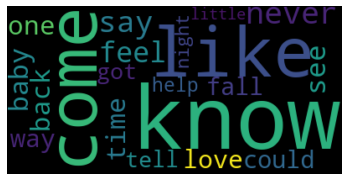

In [242]:
wcloud2 = WordCloud().generate_from_frequencies(f_fdist)
# Plotting the wordcloud
plt.imshow(wcloud2, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

#### Speak Now 

In [243]:
freq_s = FreqDist(sNoStopWords)
for i in sorted(freq_s, key=freq_s.get, reverse=True)[:20]:
    print(i,freq_s[i])

back 63
like 58
know 42
come 39
ever 35
go 33
never 32
see 32
say 30
time 29
love 23
around 23
away 22
still 22
mean 22
mind 21
could 20
grow 20
got 19
think 18


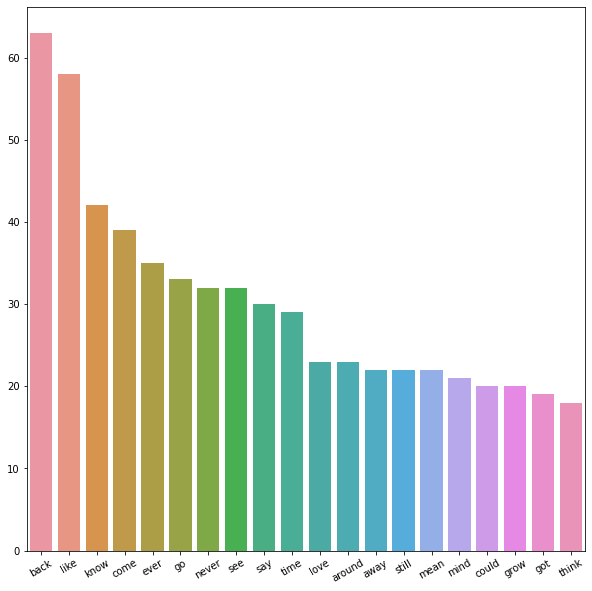

In [244]:
s_fdist = FreqDist(sNoStopWords).most_common(20)
s_fdist = pd.Series(dict(s_fdist))
fig, ax = plt.subplots(figsize=(10,10))
s_plot = sns.barplot(x=s_fdist.index, y=s_fdist.values, ax=ax)
plt.xticks(rotation=30);

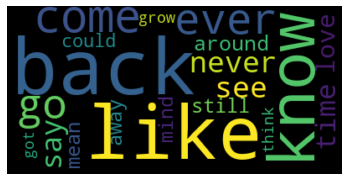

In [245]:
wcloud3 = WordCloud().generate_from_frequencies(s_fdist)
# Plotting the wordcloud
plt.imshow(wcloud3, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

#### Red

In [246]:
freq_r = FreqDist(rNoStopWords)
for i in sorted(freq_r, key=freq_r.get, reverse=True)[:20]:
    print(i,freq_r[i])

like 92
know 83
time 66
never 53
red 46
back 43
ever 35
one 33
stay 32
trouble 32
last 32
got 30
asking 25
home 25
everybody 25
love 24
better 24
tell 23
think 23
knows 23


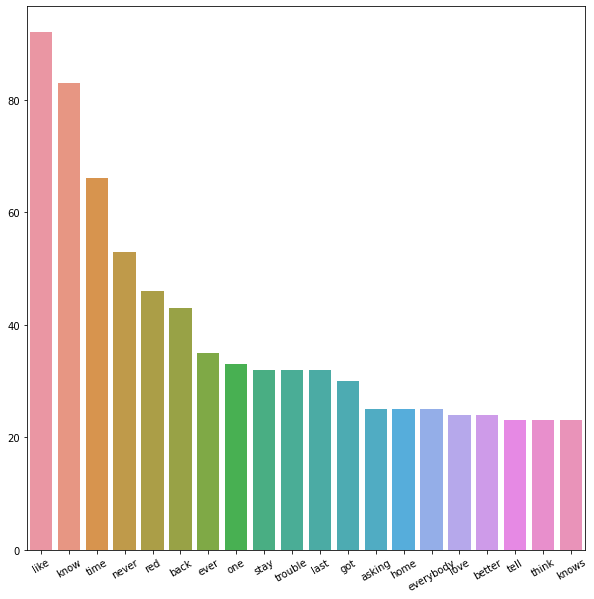

In [247]:
r_fdist = FreqDist(rNoStopWords).most_common(20)
r_fdist = pd.Series(dict(r_fdist))
fig, ax = plt.subplots(figsize=(10,10))
r_plot = sns.barplot(x=r_fdist.index, y=r_fdist.values, ax=ax)
plt.xticks(rotation=30);

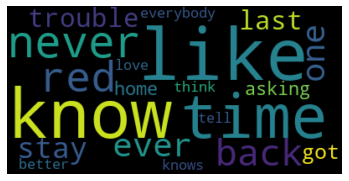

In [248]:
wcloud4 = WordCloud().generate_from_frequencies(r_fdist)
# Plotting the wordcloud
plt.imshow(wcloud4, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

#### 1989

In [249]:
freq_nine = FreqDist(nineNoStopWords)
for i in sorted(freq_nine, key=freq_nine.get, reverse=True)[:20]:
    print(i,freq_nine[i])

wish 85
love 84
shake 70
yet 65
got 55
new 45
back 44
like 42
baby 41
never 39
go 39
woods 38
clear 37
know 36
say 34
could 33
stay 32
york 30
welcome 29
girl 25


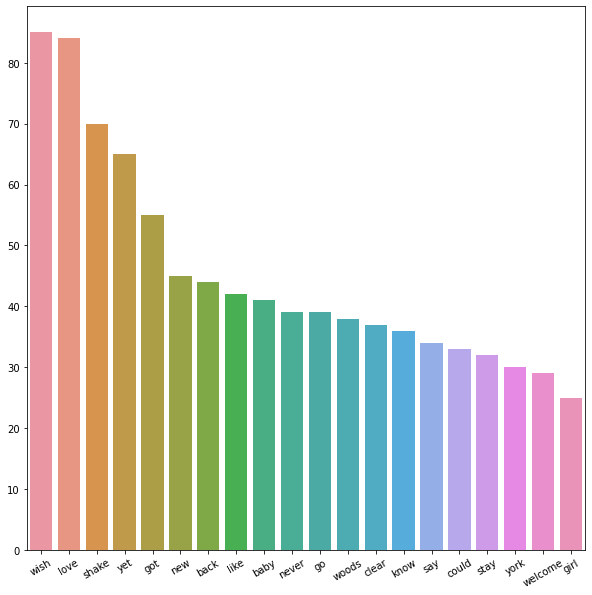

In [250]:
nine_fdist = FreqDist(nineNoStopWords).most_common(20)
nine_fdist = pd.Series(dict(nine_fdist))
fig, ax = plt.subplots(figsize=(10,10))
nine_plot = sns.barplot(x=nine_fdist.index, y=nine_fdist.values, ax=ax)
plt.xticks(rotation=30);

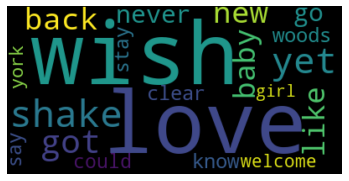

In [251]:
wcloud5 = WordCloud().generate_from_frequencies(nine_fdist)
# Plotting the wordcloud
plt.imshow(wcloud5, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

#### Reputation

In [252]:
freq_rep = FreqDist(repNoStopWords)
for i in sorted(freq_rep, key=freq_rep.get, reverse=True)[:20]:
    print(i,freq_rep[i])

like 51
made 51
look 46
want 38
baby 37
time 34
know 32
bad 29
never 27
take 27
say 27
first 26
one 26
call 26
could 26
good 24
things 23
hands 23
got 22
getaway 21


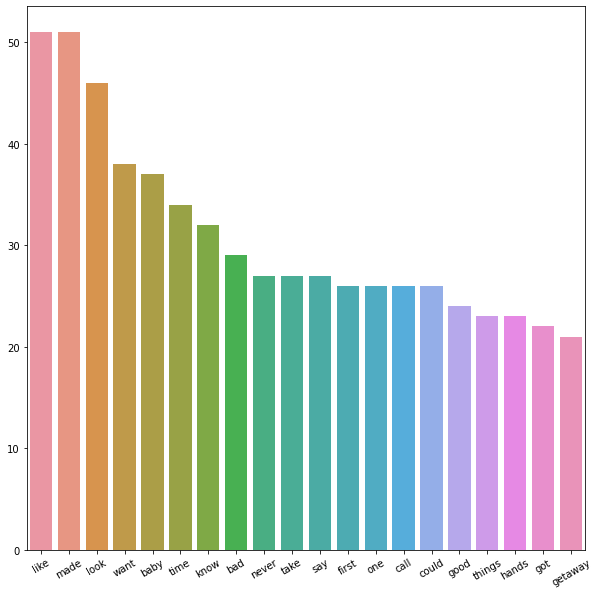

In [253]:
rep_fdist = FreqDist(repNoStopWords).most_common(20)
rep_fdist = pd.Series(dict(rep_fdist))
fig, ax = plt.subplots(figsize=(10,10))
rep_plot = sns.barplot(x=rep_fdist.index, y=rep_fdist.values, ax=ax)
plt.xticks(rotation=30);

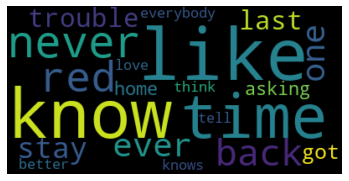

In [254]:
wcloud6 = WordCloud().generate_from_frequencies(rep_fdist)
# Plotting the wordcloud
plt.imshow(wcloud4, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

#### Lover

In [255]:
freq_l = FreqDist(lNoStopWords)
for i in sorted(freq_l, key=freq_l.get, reverse=True)[:20]:
    print(i,freq_l[i])

like 67
want 49
love 44
one 43
never 43
see 42
daylight 40
know 38
get 32
right 28
go 27
man 27
baby 26
say 23
street 23
think 22
could 21
got 20
still 20
walk 19


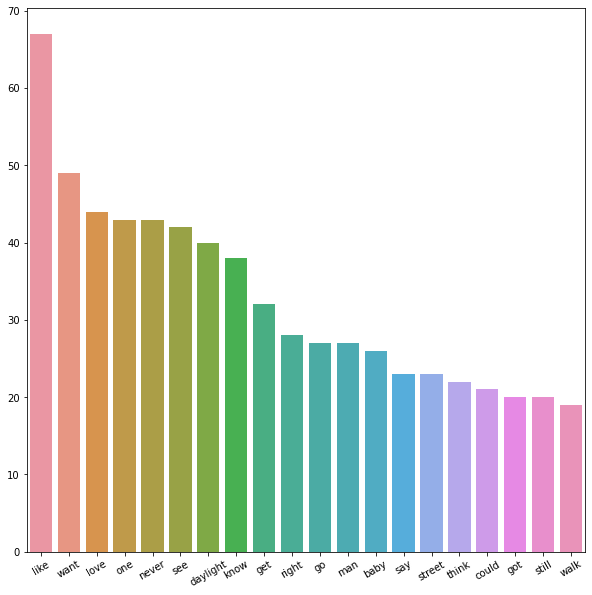

In [256]:
l_fdist = FreqDist(lNoStopWords).most_common(20)
l_fdist = pd.Series(dict(l_fdist))
fig, ax = plt.subplots(figsize=(10,10))
l_plot = sns.barplot(x=l_fdist.index, y=l_fdist.values, ax=ax)
plt.xticks(rotation=30);

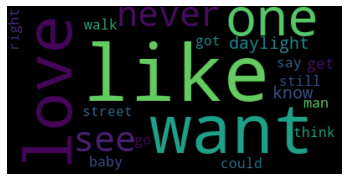

In [224]:
wcloud7 = WordCloud().generate_from_frequencies(l_fdist)
# Plotting the wordcloud
plt.imshow(wcloud7, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

#### Folklore

In [195]:
freq_fo = FreqDist(foNoStopWords)
for i in sorted(freq_fo, key=freq_fo.get, reverse=True)[:20]:
    print(i,freq_fo[i])

never 44
know 42
time 38
like 38
think 21
one 19
knew 18
gave 17
love 17
around 16
could 15
see 15
still 15
back 13
mad 13
come 12
seen 12
give 12
showed 11
woman 11


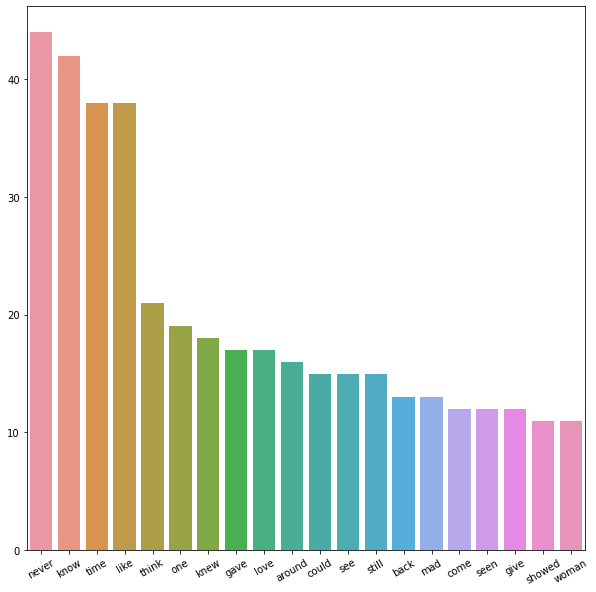

In [205]:
fo_fdist = FreqDist(foNoStopWords).most_common(20)
fo_fdist = pd.Series(dict(fo_fdist))
fig, ax = plt.subplots(figsize=(10,10))
fo_plot = sns.barplot(x=fo_fdist.index, y=fo_fdist.values, ax=ax)
plt.xticks(rotation=30);

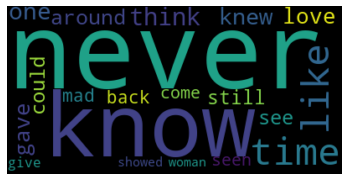

In [225]:
wcloud8 = WordCloud().generate_from_frequencies(fo_fdist)
# Plotting the wordcloud
plt.imshow(wcloud8, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()